# Machine Learning Homework 4 - PART II

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

In [1]:
# Import Packages
import pandas as pd
import numpy as np

In [2]:
def load_data():
    # Loading Comma Seperated Data using read_table pandas function in 'reviews_train_data' dataframe
    reviews_train_data = pd.read_csv("reviewstrain.txt", delimiter="\t", header=None)
    reviews_train_data = pd.DataFrame(reviews_train_data)

    # Splitting Dataset into "labels" and "reviews_text"
    reviews_train_data = pd.DataFrame(reviews_train_data[0].str.split(' ',1).tolist(), columns = ['label','reviews_text'])

    # Loading Comma Seperated Data using read_table pandas function in 'reviews_test_data' dataframe
    reviews_test_data = pd.read_csv("reviewstest.txt", delimiter="\t", header=None)
    reviews_test_data = pd.DataFrame(reviews_test_data)

    # Splitting Dataset into "labels" and "reviews_text"
    reviews_test_data = pd.DataFrame(reviews_test_data[0].str.split(' ',1).tolist(), columns = ['label','reviews_text'])
    return reviews_train_data, reviews_test_data

In [3]:
# Loading Data
reviews_train_data, reviews_test_data = load_data()

# Creating Vocabulary
reviews_words = reviews_train_data.reviews_text
vocab = []
for line in reviews_words:
    words = line.split()
    for word in words:
        if word not in vocab:
            vocab.append(word)
vocab = ['label'] + vocab
print("Voculabury of "+str(len(vocab))+" words")
print(vocab)

Voculabury of 5862 words
['label', 'a', 'stirring', ',', 'funny', 'and', 'finally', 'transporting', 're-imagining', 'of', 'beauty', 'the', 'beast', '1930s', 'horror', 'films', 'real', 'winner', '--', 'smart', 'subtle', 'resonant', '.', 'dim-witted', 'lazy', 'spin-off', 'animal', 'planet', 'documentary', 'series', 'crocodile', 'hunter', 'is', 'entertainment', 'opportunism', 'at', 'its', 'most', 'glaring', '`', 'anyone', 'with', 'passion', 'for', 'cinema', 'indeed', 'sex', 'should', 'see', 'it', 'as', 'soon', 'possible', "'", 'crass', 'insulting', 'homage', 'to', 'great', 'like', 'some', 'hot', 'john', 'wayne', 'classics', 'an', 'infuriating', 'film', 'stealing', 'harvard', 'will', 'dip', 'into', 'your', 'wallet', 'swipe', '90', 'minutes', 'time', 'offer', 'you', 'precisely', 'this', 'in', 'recompense', ':', 'few', 'early', 'laughs', 'scattered', 'around', 'plot', 'thin', 'repetitious', 'poignant', 'lyricism', 'runs', 'through', 'balzac', 'little', 'chinese', 'seamstress', 'that', 'trans

In [4]:
def transform(dataset):
    # Data Transformation - One Hot-Encoding in Dataframe
    transformed_df = pd.DataFrame(columns=vocab)
    data = []
    for index,review in dataset.iterrows():
        line = review['reviews_text']
        label = review['label']
        line_result = []
        line_result.append(label)
        words = line.split()
        for word in vocab[1:]:
            if word not in words:
                line_result.append(0)
            else:
                line_result.append(1)        
        data.append(line_result)   
    transformed_df = transformed_df.append(pd.DataFrame(data, columns=vocab))
    return transformed_df

In [5]:
transform_train_df = transform(reviews_train_data)
transform_test_df = transform(reviews_test_data)

In [6]:
import math

# Calculates Information Gain
def info_gain_cal(parent_entropy,child1, entropy_child1, child2, entropy_child2):
    total = child1 + child2
    child1_ratio = child1/total
    child2_ratio = child2/total
    info_gain = (parent_entropy) - ((child1_ratio *entropy_child1) + (child2_ratio *entropy_child2))
    return info_gain

# Calculates Entropy
def entropy_cal(child_class0, child_class1):
    child_total = child_class0 + child_class1
    class0_ratio = child_class0/child_total
    class1_ratio = child_class1/child_total
    entropy_child = 0 
    if(class0_ratio != 0):
        entropy_child = entropy_child - ((class0_ratio)*math.log2(class0_ratio))
    if(class1_ratio != 0):
        entropy_child = entropy_child - ((class1_ratio)*math.log2(class1_ratio))
    return entropy_child

In [7]:
# Calculating Information gain for all attributes
attribute_info_gain = []
df_class0 = transform_train_df[(transform_train_df['label'] == "0")]
df_class1 = transform_train_df[(transform_train_df['label'] == "1")]

# Calculate Parent Entropy
parent_entropy = entropy_cal(len(df_class0),len(df_class1))
print("Class 0 Size = " +str(len(df_class0)))
print("Class 1 Size = " +str(len(df_class1)))
print("Parent Entropy = "+ str(parent_entropy))

# Calculate Attributes Info-gain
for name in vocab[1:]:
    df_child1_class0 = transform_train_df[(transform_train_df[name] == 0) & (transform_train_df['label'] == "0")]
    df_child1_class1 = transform_train_df[(transform_train_df[name] == 0) & (transform_train_df['label'] == "1")]
    df_child2_class0 = transform_train_df[(transform_train_df[name] == 1) & (transform_train_df['label'] == "0")]
    df_child2_class1 = transform_train_df[(transform_train_df[name] == 1) & (transform_train_df['label'] == "1")]
    entropy_child1 = entropy_cal(len(df_child1_class0),len(df_child1_class1))
    entropy_child2 = entropy_cal(len(df_child2_class0),len(df_child2_class1))
    info_gain =  info_gain_cal(parent_entropy,len(df_child1_class0)+len(df_child1_class1), entropy_child1, len(df_child2_class0)+len(df_child2_class1), entropy_child2)
    attribute_info_gain.append(info_gain)
print("Total Info-Gain Attributes Calculated = "+str(len(attribute_info_gain))) 

Class 0 Size = 689
Class 1 Size = 811
Parent Entropy = 0.9952229310409331
Total Info-Gain Attributes Calculated = 5861


### Question 5.A: List the 5 tokens that occur most frequently in the training set.

In [8]:
most_frequent = transform_train_df.loc[:, transform_train_df.columns != 'label'].sum()
most_frequent = most_frequent.nlargest(5)
most_frequent

.      1426.0
,       816.0
the     780.0
and     737.0
a       722.0
dtype: float64

### Question 5.B: Using just the training documents, calculate the information gain of every attribute. List the 5 attributes with the highest information gain.

In [9]:
attributes_info_gain_df = {'Attribute':vocab[1:],'Infogain':attribute_info_gain}
top_5_ig_attributes = pd.DataFrame(attributes_info_gain_df)
top_5_ig_attributes = top_5_ig_attributes.nlargest(5,'Infogain')
top_5_ig_attributes

,Attribute,Infogain
229,bad,0.023921
268,best,0.019523
162,n't,0.013443
793,too,0.011238
259,moving,0.011049


In [11]:
def top_k_attributes(k):
    top_k_ig_attributes = pd.DataFrame(attributes_info_gain_df)
    top_k_ig_attributes = top_k_ig_attributes.nlargest(k,'Infogain')

    # Considering Features which are related to opioid compounds
    top_k_attribute_names = set(transform_train_df.columns).intersection(set(top_k_ig_attributes.Attribute))
    return top_k_attribute_names

top_50_attribute_names = top_k_attributes(50)
top_50_attribute_names

{"'",
 '?',
 'and',
 'any',
 'around',
 'bad',
 'beautifully',
 'best',
 'contrived',
 'documentary',
 'dull',
 'entertaining',
 'excellent',
 'get',
 'heart',
 'hilarious',
 'if',
 'intriguing',
 'it',
 'jokes',
 'long',
 'love',
 'mess',
 'minutes',
 'movie',
 'moving',
 "n't",
 'no',
 'or',
 'performance',
 'performances',
 'plot',
 'poor',
 'poorly',
 'portrait',
 'powerful',
 'rare',
 'script',
 'solid',
 'stupid',
 'terrible',
 'things',
 'this',
 'too',
 'touching',
 'unfunny',
 'why',
 'with',
 'worst',
 'would'}

In [12]:
def get_top_k_features(transformed_df, top_k_attribute_names):
    feature_df = transformed_df.copy()
    data_columns = []

    # Removing other attributes
    for each in transformed_df.columns:
        if each in top_k_attribute_names:
            data_columns.append(each)
        elif each == 'label':
                data_columns.append(each)
        else:
            pass

    feature_df = feature_df[data_columns]
    return feature_df

training_df = get_top_k_features(transform_train_df, top_50_attribute_names)
training_df.head()

,label,and,documentary,with,it,',minutes,this,around,plot,...,things,?,rare,excellent,beautifully,jokes,mess,unfunny,poorly,poor
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# I is matrix of input examples
# D is matrix of output examples
# n_hidden is number of nodes in hidden layer
# n_max is number of training epochs
def bp(I,D,n_hidden,eta,n_max):
    np.random.seed(1926)
    
    r_inp, c_inp = I.shape
    n_examples = r_inp
    n_input    = c_inp
    r_out,c_out = D.shape
    n_output   = c_out

    w = np.random.random((n_input, n_hidden))
    wb = np.random.random(n_hidden)
    v = np.random.random((n_hidden, n_output))
    vb = np.random.random(n_output)
    err_curve = np.zeros((n_max,c_out))

    for n in range(n_max):
        sq_err_sum = np.zeros((1,n_output))
    
        for k in range(n_examples):
            x = I[k,:].reshape([1,-1])
            z = sigmoid(x.dot(w)+wb)
            y = sigmoid(z.dot(v)+vb)
            err = -(D[k,:]*np.log(y) + (1-D[k,:])*np.log(1-y)).reshape([1,-1])
            sq_err_sum += -(D[k,:]*np.log(y) + (1-D[k,:])*np.log(1-y))
            #err = (D[k,:] - y).reshape([1,-1])
            #sq_err_sum += 0.5*np.square(err)
            
            #Delta_output = err*(1-y)*y 
            Delta_output = D[k,:] - y
            Delta_v = z.T.dot(Delta_output)
            Delta_vb = np.sum(Delta_output,axis=0)

            Delta_hidden = Delta_output.dot(v.T)*(1-z)*z
            Delta_w = x.T.dot(Delta_hidden) 
            Delta_wb = np.sum(Delta_hidden,axis=0) 
        
            v += eta*Delta_v
            vb += eta*Delta_vb
            w += eta*Delta_w
            wb += eta*Delta_wb

            err_curve[n] = sq_err_sum/n_examples
    
        print('epoch %d: err %f'%(n,np.mean(sq_err_sum)/n_examples))
    
    plt.plot(np.linspace(0,n_max-1,n_max),np.mean(err_curve,axis=1))        
    plt.show()
    return w,wb,v,vb,err_curve 

In [14]:
def convert_df_to_nparray(df):
    # Convert Dataset to np.array format for training dataset
    df_input = df.drop('label',1)
    df_output = df['label']
    df_input = np.array(df_input.values.tolist())
    df_output = np.asarray(df_output.values)
    df_output = df_output.astype(int)
    return df_input, df_output

training_df_input, training_df_output = convert_df_to_nparray(training_df)

epoch 0: err 0.703604
epoch 1: err 0.690296
epoch 2: err 0.689125
epoch 3: err 0.687870
epoch 4: err 0.686409
epoch 5: err 0.684597
epoch 6: err 0.682248
epoch 7: err 0.679145
epoch 8: err 0.675065
epoch 9: err 0.669885
epoch 10: err 0.663691
epoch 11: err 0.656802
epoch 12: err 0.649628
epoch 13: err 0.642477
epoch 14: err 0.635486
epoch 15: err 0.628660
epoch 16: err 0.621945
epoch 17: err 0.615286
epoch 18: err 0.608654
epoch 19: err 0.602052
epoch 20: err 0.595509
epoch 21: err 0.589069
epoch 22: err 0.582780
epoch 23: err 0.576686
epoch 24: err 0.570821
epoch 25: err 0.565209
epoch 26: err 0.559863
epoch 27: err 0.554791
epoch 28: err 0.549994
epoch 29: err 0.545468
epoch 30: err 0.541210
epoch 31: err 0.537211
epoch 32: err 0.533465
epoch 33: err 0.529961
epoch 34: err 0.526692
epoch 35: err 0.523646
epoch 36: err 0.520813
epoch 37: err 0.518182
epoch 38: err 0.515741
epoch 39: err 0.513478
epoch 40: err 0.511382
epoch 41: err 0.509438
epoch 42: err 0.507637
epoch 43: err 0.50596

epoch 347: err 0.474062
epoch 348: err 0.474048
epoch 349: err 0.474034
epoch 350: err 0.474020
epoch 351: err 0.474006
epoch 352: err 0.473991
epoch 353: err 0.473977
epoch 354: err 0.473962
epoch 355: err 0.473947
epoch 356: err 0.473932
epoch 357: err 0.473917
epoch 358: err 0.473902
epoch 359: err 0.473887
epoch 360: err 0.473871
epoch 361: err 0.473856
epoch 362: err 0.473840
epoch 363: err 0.473824
epoch 364: err 0.473808
epoch 365: err 0.473792
epoch 366: err 0.473776
epoch 367: err 0.473759
epoch 368: err 0.473743
epoch 369: err 0.473726
epoch 370: err 0.473709
epoch 371: err 0.473692
epoch 372: err 0.473675
epoch 373: err 0.473658
epoch 374: err 0.473640
epoch 375: err 0.473623
epoch 376: err 0.473605
epoch 377: err 0.473587
epoch 378: err 0.473569
epoch 379: err 0.473551
epoch 380: err 0.473532
epoch 381: err 0.473514
epoch 382: err 0.473495
epoch 383: err 0.473476
epoch 384: err 0.473457
epoch 385: err 0.473438
epoch 386: err 0.473419
epoch 387: err 0.473399
epoch 388: err 0

epoch 689: err 0.464980
epoch 690: err 0.464962
epoch 691: err 0.464944
epoch 692: err 0.464926
epoch 693: err 0.464909
epoch 694: err 0.464891
epoch 695: err 0.464874
epoch 696: err 0.464857
epoch 697: err 0.464839
epoch 698: err 0.464822
epoch 699: err 0.464805
epoch 700: err 0.464788
epoch 701: err 0.464771
epoch 702: err 0.464755
epoch 703: err 0.464738
epoch 704: err 0.464721
epoch 705: err 0.464705
epoch 706: err 0.464688
epoch 707: err 0.464672
epoch 708: err 0.464656
epoch 709: err 0.464640
epoch 710: err 0.464624
epoch 711: err 0.464608
epoch 712: err 0.464592
epoch 713: err 0.464576
epoch 714: err 0.464561
epoch 715: err 0.464545
epoch 716: err 0.464530
epoch 717: err 0.464514
epoch 718: err 0.464499
epoch 719: err 0.464484
epoch 720: err 0.464468
epoch 721: err 0.464453
epoch 722: err 0.464438
epoch 723: err 0.464423
epoch 724: err 0.464409
epoch 725: err 0.464394
epoch 726: err 0.464379
epoch 727: err 0.464365
epoch 728: err 0.464350
epoch 729: err 0.464336
epoch 730: err 0

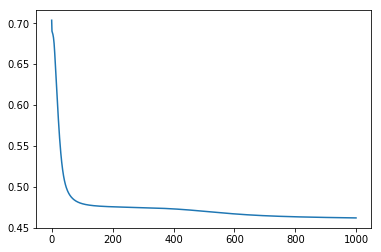

In [15]:
w,wb,v,vb,err_curve = bp(training_df_input, training_df_output.reshape([-1,1]), 2, 0.01, 1000);

In [16]:
def NNPredictions(w, wb, v, vb, test_data):
    
    test_labels = []
    
    for x in test_data:
        z = sigmoid(x.dot(w)+wb)
        y = sigmoid(z.dot(v)+vb)
        
        if y > 0.5:
            test_labels.append(1)
        else:
            test_labels.append(0)
            
    return test_labels

In [17]:
testing_df = get_top_k_features(transform_test_df, top_50_attribute_names)
testing_df_input, testing_df_output = convert_df_to_nparray(testing_df)

predictions = NNPredictions(w, wb, v, vb, testing_df_input)
# Adding Predicted Label in Test Dataset
predicted_test_data = {
    'actual_label': testing_df['label'],
    'predicted_label': predictions
}
predicted_test_data = pd.DataFrame(predicted_test_data)

In [18]:
# Get Accuracy, TP/TN/FP/FN of the Model
def get_model_metrics(predicted_test_data):
    # Initializing variables
    correct_pred = 0
    total_pred = 0
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for row in predicted_test_data.itertuples():
        total_pred = total_pred + 1
        # Correct Predictions
        if int(row.actual_label) == int(row.predicted_label):
            correct_pred = correct_pred + 1
            # True Positive
            if (int(row.actual_label) == 1 and int(row.predicted_label) == 1):
                true_positive = true_positive + 1
            # True Negative
            elif  (int(row.actual_label) == 0 and int(row.predicted_label) == 0):   
                    true_negative = true_negative + 1
        # False Positive
        elif  (int(row.actual_label) == 0 and int(row.predicted_label) == 1):   
                false_positive = false_positive + 1
        # False Negative
        elif  (int(row.actual_label) == 1 and int(row.predicted_label) == 0):   
                false_negative = false_negative + 1
    # Accuracy
    accuracy = (correct_pred/total_pred)*100
    tpr = true_positive/(true_positive + false_negative)
    fpr = false_positive/(false_positive + true_negative)
    
    # Model Metrics Dataframe
    model_metrics = {
        'total_predictions': total_pred, 
        'correct_predictions': correct_pred, 
        'accuracy': accuracy, 
        'true_positive': true_positive, 
        'false_positive': false_positive, 
        'true_negative': true_negative, 
        'false_negative': false_negative,
        'tpr': tpr,
        'fpr': fpr
    }
    
    return model_metrics

In [19]:
model_metrics = get_model_metrics(predicted_test_data)
print("Neural Network Accuracy (In Percentage) = " +str(model_metrics['accuracy']))

Neural Network Accuracy (In Percentage) = 69.0


### Question 5.D: What percentage accuracy is achieved if you use Zero-R, instead of a neural net?

In [20]:
# Zero-R Classifier
def zero_r_classifier(reviews_test_data, reviews_train_data):
    label_1 = reviews_train_data['label'].value_counts()[0]
    label_0 = reviews_train_data['label'].value_counts()[1]
    
    # Majority in training set is Zero-R Label
    if label_1 > label_0:
        zero_r_label = 1
    else: 
        zero_r_label = 0
    
    # Adding Zero-R Predicted Label in Test Dataset
    predicted_test_data = {
        'testdata_reviews_text': reviews_test_data.reviews_text,
        'actual_label': reviews_test_data.label,
        'predicted_label': zero_r_label
    }
    predicted_test_data = pd.DataFrame(predicted_test_data)
    return predicted_test_data

In [21]:
# Running Zero R Classifier on given datasets
predicted_test_data = zero_r_classifier(reviews_test_data, reviews_train_data)
model_metrics = get_model_metrics(predicted_test_data)
print("Zero-R Classifier Accuracy (In Percentage) = " +str(model_metrics['accuracy']))

Zero-R Classifier Accuracy (In Percentage) = 54.6


## Question 5.E:
We used only the top 50 attributes, but we could have used the top k attributes, for larger or
smaller k. Why is it reasonable to think that increasing the number of attributes might increase
accuracy? Why is it reasonable to think that decreasing the number of attributes might increase
accuracy? Answer both questions. 

## Question 5.F:
Perform experiments to see how accuracy changes as you vary the number k of attributes for
your neural net. Choose at least 4 values of k (in addition to k = 50) and graph the results.
The horizontal axis should correspond to the number of attributes, and the vertical to the test
accuracy. Did the results surprise you? Did you have any difficulties running the experiments?
Give the graph AND the answers to these two questions.

In [22]:
def neural_net_classfier(k):
    top_k_attribute_names = top_k_attributes(k)
    training_df = get_top_k_features(transform_train_df, top_k_attribute_names)
    training_df_input, training_df_output = convert_df_to_nparray(training_df)
    w,wb,v,vb,err_curve = bp(training_df_input, training_df_output.reshape([-1,1]), 2, 0.01, 1000)

    testing_df = get_top_k_features(transform_test_df, top_k_attribute_names)
    testing_df_input, testing_df_output = convert_df_to_nparray(testing_df)

    predictions = NNPredictions(w, wb, v, vb, testing_df_input)
    # Adding Predicted Label in Test Dataset
    predicted_test_data = {
        'actual_label': testing_df['label'],
        'predicted_label': predictions
    }
    predicted_test_data = pd.DataFrame(predicted_test_data)

    model_metrics = get_model_metrics(predicted_test_data)
    print("Neural Network Accuracy (In Percentage) = " +str(model_metrics['accuracy']))
    return model_metrics['accuracy']

In [ ]:
k_list = [10]
accuracy_list = []
for k in k_list:
    accuracy = neural_net_classfier(k)
    accuracy_list.append(accuracy)
accuracy_list

epoch 0: err 0.695900
epoch 1: err 0.691360
epoch 2: err 0.691277
epoch 3: err 0.691202
epoch 4: err 0.691133
epoch 5: err 0.691064
epoch 6: err 0.690989
epoch 7: err 0.690904
epoch 8: err 0.690801
epoch 9: err 0.690675
epoch 10: err 0.690515
epoch 11: err 0.690310
epoch 12: err 0.690045
epoch 13: err 0.689701
epoch 14: err 0.689253
epoch 15: err 0.688670
epoch 16: err 0.687915
epoch 17: err 0.686943
epoch 18: err 0.685706
epoch 19: err 0.684161
epoch 20: err 0.682277
epoch 21: err 0.680054
epoch 22: err 0.677531
epoch 23: err 0.674784
epoch 24: err 0.671901
epoch 25: err 0.668958
epoch 26: err 0.665993
epoch 27: err 0.663008
epoch 28: err 0.659989
epoch 29: err 0.656922
epoch 30: err 0.653807
epoch 31: err 0.650663
epoch 32: err 0.647528
epoch 33: err 0.644444
epoch 34: err 0.641458
epoch 35: err 0.638607
epoch 36: err 0.635920
epoch 37: err 0.633412
epoch 38: err 0.631091
epoch 39: err 0.628955
epoch 40: err 0.627001
epoch 41: err 0.625218
epoch 42: err 0.623599
epoch 43: err 0.62213

epoch 346: err 0.605244
epoch 347: err 0.605240
epoch 348: err 0.605235
epoch 349: err 0.605231
epoch 350: err 0.605226
epoch 351: err 0.605222
epoch 352: err 0.605218
epoch 353: err 0.605213
epoch 354: err 0.605209
epoch 355: err 0.605205
epoch 356: err 0.605200
epoch 357: err 0.605196
epoch 358: err 0.605192
epoch 359: err 0.605188
epoch 360: err 0.605184
epoch 361: err 0.605180
epoch 362: err 0.605176
epoch 363: err 0.605172
epoch 364: err 0.605168
epoch 365: err 0.605164
epoch 366: err 0.605160
epoch 367: err 0.605156
epoch 368: err 0.605152
epoch 369: err 0.605148
epoch 370: err 0.605144
epoch 371: err 0.605141
epoch 372: err 0.605137
epoch 373: err 0.605133
epoch 374: err 0.605130
epoch 375: err 0.605126
epoch 376: err 0.605123
epoch 377: err 0.605119
epoch 378: err 0.605115
epoch 379: err 0.605112
epoch 380: err 0.605109
epoch 381: err 0.605105
epoch 382: err 0.605102
epoch 383: err 0.605098
epoch 384: err 0.605095
epoch 385: err 0.605092
epoch 386: err 0.605089
epoch 387: err 0

epoch 687: err 0.604516
epoch 688: err 0.604515
epoch 689: err 0.604513
epoch 690: err 0.604512
epoch 691: err 0.604510
epoch 692: err 0.604509
epoch 693: err 0.604507
epoch 694: err 0.604506
epoch 695: err 0.604505
epoch 696: err 0.604503
epoch 697: err 0.604502
epoch 698: err 0.604500
epoch 699: err 0.604499
epoch 700: err 0.604498
epoch 701: err 0.604496
epoch 702: err 0.604495
epoch 703: err 0.604493
epoch 704: err 0.604492
epoch 705: err 0.604491
epoch 706: err 0.604489
epoch 707: err 0.604488
epoch 708: err 0.604486
epoch 709: err 0.604485
epoch 710: err 0.604484
epoch 711: err 0.604482
epoch 712: err 0.604481
epoch 713: err 0.604480
epoch 714: err 0.604478
epoch 715: err 0.604477
epoch 716: err 0.604475
epoch 717: err 0.604474
epoch 718: err 0.604473
epoch 719: err 0.604471
epoch 720: err 0.604470
epoch 721: err 0.604469
epoch 722: err 0.604467
epoch 723: err 0.604466
epoch 724: err 0.604465
epoch 725: err 0.604463
epoch 726: err 0.604462
epoch 727: err 0.604460
epoch 728: err 0

In [109]:
accuracy_list

[69.0, 69.0, 69.0, 69.0, 69.0]